In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../')
from pose_graph_partitioning.pose_graph import *
from pose_graph_partitioning.pose_graph_partitioning import *
from simulate_utils import ATE, align_posegraph

plt.rc("figure", figsize=(10,10))
def compare(groundtruth_file=None, results=None, inputs=None, ceres_res=None, show=True,
     show_on_same_plot=True, unino_input=True, plot3d=False):
    if groundtruth_file is not None:
        pg_gt = PoseGraph()
        pg_gt.read_g2o_single(groundtruth_file)
        align_posegraph(pg_gt)
    if inputs is not None:
        pg_input = PoseGraph()
        pg_input.read_g2o_folder(inputs)
        align_posegraph(pg_input)
        if groundtruth_file is not None:
            ate_T, ate_rot = ATE(pg_input, pg_gt)
            print(f"ATE of input {ate_T:.2f} {ate_rot*57.3:.2f} deg") 
        if unino_input:
            partitioning(pg_input, "vol", agent_num=1, show=False, method="union")
    if results is not None:
        pg_res = PoseGraph()
        pg_res.read_g2o_folder(results)
        align_posegraph(pg_res)
        if groundtruth_file is not None:
            ate_T, ate_rot = ATE(pg_res, pg_gt)
            print(f"ATE of result {ate_T:.2f} {ate_rot*57.3:.2f} deg") 
        if unino_input:
            partitioning(pg_res, "vol", agent_num=1, show=False, method="union")
    if ceres_res is not None:
        pg_ceres = PoseGraph()
        pg_ceres.read_g2o_single(ceres_res)
        align_posegraph(pg_ceres)
        if groundtruth_file is not None:
            ate_T, ate_rot = ATE(pg_gt, pg_ceres, debug=False)
            print(f"ATE of ceres {ate_T:.2f} {ate_rot*57.3:.2f} deg") 
    if show:
        if inputs is not None:
            ax = pg_input.show("Input", clear=False, show_edges=False, plot3d=plot3d)
        else:
            ax = None
        if ceres_res is not None:
            if not show_on_same_plot:
                ax = None
            ax = pg_ceres.show("ceres", ax=ax, clear=False, show_edges=False, plot3d=plot3d, marker="+")
        if not show_on_same_plot:
            ax = None
        if groundtruth_file is not None:
            ax = pg_gt.show("GT", ax=ax, show_edges=False, clear=False, plot3d=plot3d)
        if not show_on_same_plot:
            ax = None
        if results:
            pg_res.show("Res", ax=ax, clear=False, show_edges=False, plot3d=plot3d)
        plt.show()

Total agents 5 keyframes 1661 edges 6275 inter edge 3246 comm_vol 1673 keyframes 167<->498
ATE of input 18.34 9.04 deg
New partion obj -1 agents 1 keyframes 1661<->1661 inter edges 0 comm_vol 0
Total agents 5 keyframes 1661 edges 6275 inter edge 3246 comm_vol 1673 keyframes 167<->498
ATE of result 10.41 3.66 deg
New partion obj -1 agents 1 keyframes 1661<->1661 inter edges 0 comm_vol 0


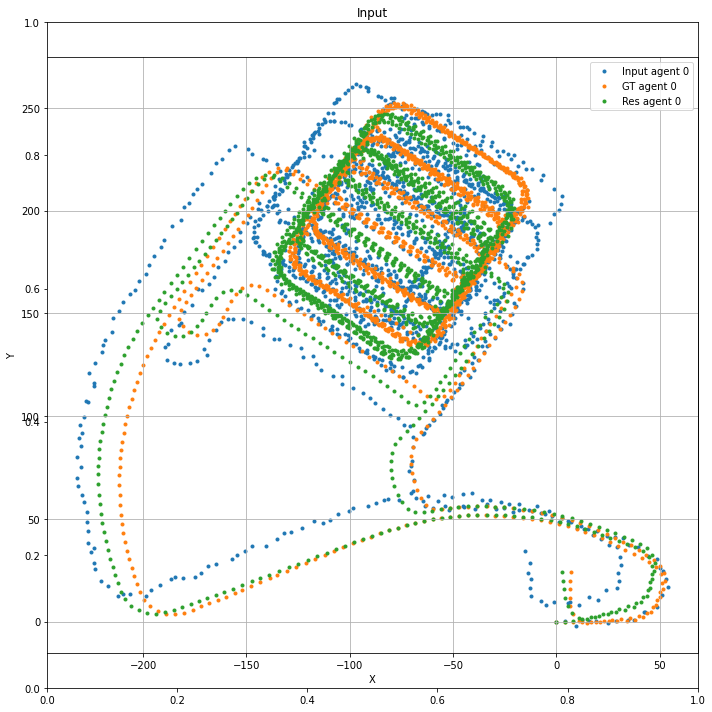

In [7]:
groundtruth_file = '/home/xuhao/data/d2slam/pgo/parking-garage/groundtruth.g2o'
results = '/home/xuhao/data/d2slam/pgo/parking-garage/output'
inputs = '/home/xuhao/data/d2slam/pgo/parking-garage/input'
ceres_res = None #"/home/xuhao/data/d2slam/pgo/parking-garage/ceres-output.g2o"

compare(groundtruth_file, results, inputs, ceres_res=ceres_res, show_on_same_plot=True)

In [ ]:
groundtruth_file = '/home/xuhao/data/d2slam/pgo/input_INTEL_g2o/groundtruth.g2o'
results = '/home/xuhao/data/d2slam/pgo/input_INTEL_g2o/output'
inputs = '/home/xuhao/data/d2slam/pgo/input_INTEL_g2o/input'
ceres_res = "/home/xuhao/data/d2slam/pgo/input_INTEL_g2o/ceres-output.g2o"
compare(groundtruth_file, results, inputs, ceres_res=ceres_res)

Total agents 5 keyframes 5750 edges 12486 inter edge 1532 comm_vol 2427 keyframes 576<->1725
ATE of input 16.41 9.20 deg
New partion obj -1 agents 1 keyframes 5750<->5750 inter edges 0 comm_vol 0
Total agents 5 keyframes 5750 edges 12486 inter edge 1508 comm_vol 1674 keyframes 368<->1939
ATE of result 23.33 146.53 deg
New partion obj -1 agents 1 keyframes 5750<->5750 inter edges 0 comm_vol 0
ATE of ceres 11.14 37.12 deg


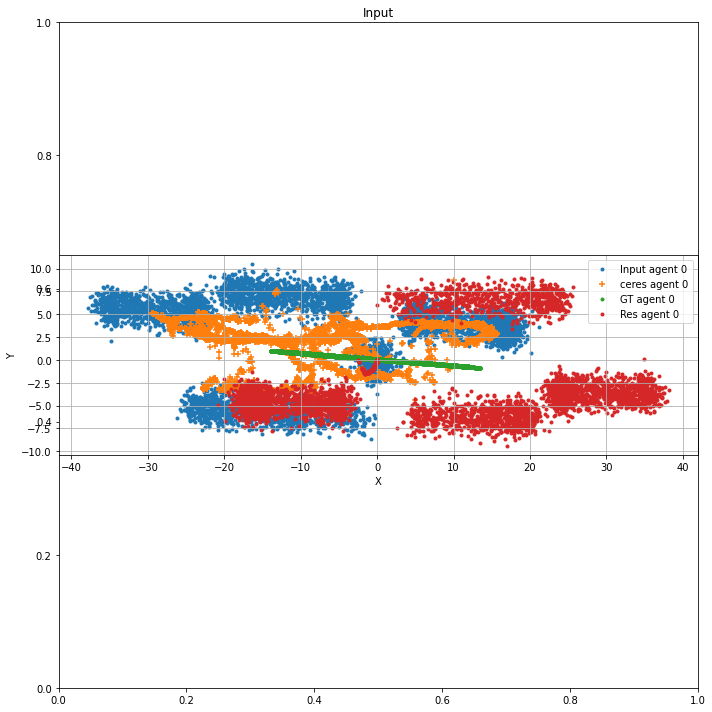

In [4]:
groundtruth_file = '/home/xuhao/data/d2slam/pgo/cubicle/groundtruth.g2o'
results = '/home/xuhao/data/d2slam/pgo/cubicle/output'
# inputs = '/home/xuhao/data/d2slam/pgo/cubicle/input'
# ceres_res = "/home/xuhao/data/d2slam/pgo/cubicle/ceres-output.g2o"
compare(groundtruth_file, results, inputs, ceres_res=ceres_res)

Total agents 5 keyframes 5000 edges 9048 inter edge 400 comm_vol 793 keyframes 501<->1500
ATE of result 2.25 12.22 deg
New partion obj -1 agents 1 keyframes 5000<->5000 inter edges 0 comm_vol 0


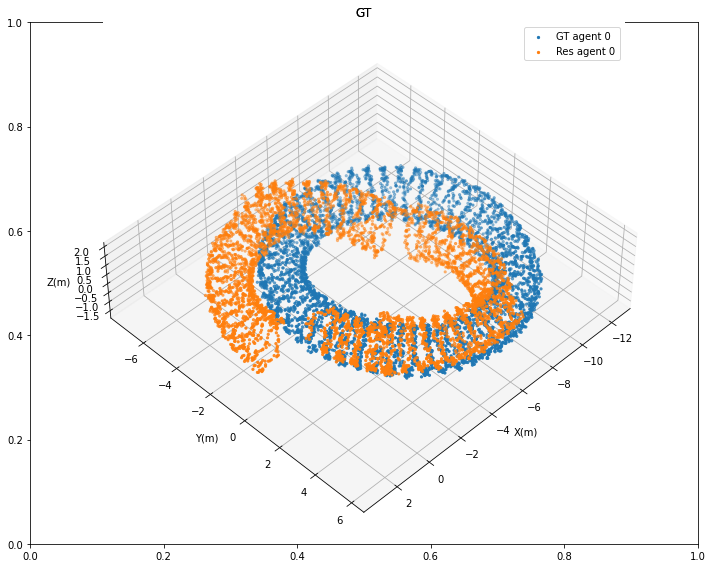

In [26]:
plt.rc("figure", figsize=(10,8))
groundtruth_file = '/home/xuhao/data/d2slam/pgo/torus3D/groundtruth.g2o'
results = '/home/xuhao/data/d2slam/pgo/torus3D/output'
inputs = None #'/home/xuhao/data/d2slam/pgo/torus3D/input'
ceres_res = None #"/home/xuhao/data/ 5 rd2slam/pgo/torus3D/ceres-output.g2o"
compare(groundtruth_file, results, inputs, ceres_res=ceres_res, plot3d=True)

Total agents 5 keyframes 5500 edges 6192 inter edge 418 comm_vol 698 keyframes 0<->2841
ATE of result 1.04 3.79 deg


../pose_graph_partitioning/pose_graph.py:727: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return poses, np.array(axes_x),np.array(axes_y),np.array(axes_z), kf_mc, np.array(edges_a), np.array(edges_b)-np.array(edges_a), np.array(edge_real), line_color


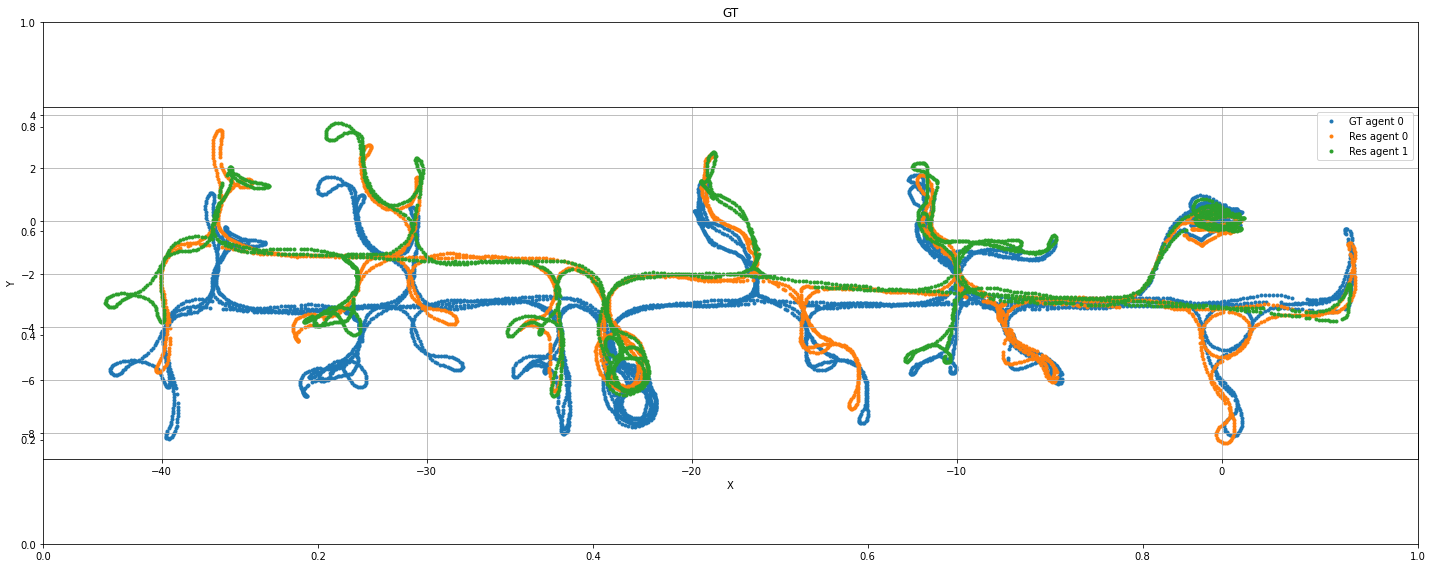

In [3]:
plt.rc("figure", figsize=(20,8))
results = '/home/xuhao/data/d2slam/pgo/tum_corr/output'
inputs = None #'/home/xuhao/data/d2slam/pgo/tum_corr/input'
ceres_res = None #"/home/xuhao/data/d2slam/pgo/tum_corr/ceres-output.g2o"
groundtruth_file = '/home/xuhao/data/d2slam/pgo/tum_corr/groundtruth.g2o'
compare(groundtruth_file, results, inputs, ceres_res=ceres_res, unino_input=False, plot3d=False)